In [74]:
import optuna
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

import numpy as np
import pandas as pd
import sklearn
import scipy

In [102]:
class KNN:
    def __init__(self, k=1, kernel = 'uniform', metric = 'minkowski', p = 2, kernel_density=None, a=1, b=1):
        self.apost_weights = None
        self.X_train = []
        self.y_train = []
        self.k = k
        add = 0
        self.a = a
        self.b = b
        if kernel_density is None:
            add = 1
        self.neighbor_finder = NearestNeighbors(n_neighbors=(k + add), metric=metric, p=p)
        self.kernel = kernel
        self.kernel_density = kernel_density
    
    def fit(self, X, y, w=None):
        self.X_train = X
        self.y_train = y
        self.apost_weights = w
        self.neighbor_finder.fit(X)

    def predict(self, X):
        predictions_ = [self._predict(x) for x in X]
        return np.array(predictions_)

    def _predict(self, x):
        distances, indices = self.neighbor_finder.kneighbors([x])
        if self.kernel_density is None:
            distances = np.divide(distances[0], distances[0][self.k]) 
            distances = distances[:-1]
            indices = indices[0][:-1]
        else:
            distances = distances[0] / (np.ones(self.k) * self.kernel_density)
            indices = indices[0]
        [weights, labels] = self._get_weights(distances, indices)
        scores = {}

        for i in labels:
            scores[i] = 0
        for i in range(len(weights)):
            scores[labels[i]] += weights[i]
        if not bool(scores):
            return y_train[0]
        return max(scores, key=scores.get)
    
    def _get_weights(self, distances, indices):
        weights = []
        labels = []
        for i in range(len(distances)):
            x = distances[i]
            if self.kernel == 'uniform':
                if x < 1:
                    weights.append(.5)
                    labels.append(self.y_train[indices[i]])
            if self.kernel == 'gauss':
                weights.append(scipy.stats.norm.pdf(x))
                labels.append(self.y_train[indices[i]])
            if self.kernel == 'general':
                if x < 1:
                    weights.append((1 - abs(x) ** self.a) ** self.b)
                    labels.append(self.y_train[indices[i]])
        if self.apost_weights is not None:
            for i in range(len(weights)):
                weights[i] *= self.apost_weights[indices[i]]
        return [weights, labels]

In [45]:
def test():
    samples = [[0., 0., 0.], [1., 1., 1.], [2., 2., 2.]]
    check = [0, 1, 6]
    knn = KNN(k=1, kernel='general', a=1, b=1)
    knn.fit(samples, check)
    print(knn.predict([[1, 2, 2]]))
    
test()

[6]


In [46]:
data = pd.read_csv('KNNAlgorithmDataset.csv')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [47]:
X = data.drop('diagnosis',axis=1).values 
y = data['diagnosis'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, shuffle = True)

In [48]:
def accuracy(y_real, y_expected):
    count = 0
    for i in range(len(y_real)):
        count += (y_real[i] == y_expected[i])
    return count/len(y_expected) * 100

my_knn = KNN(k=3)
my_knn.fit(X_train, y_train)
predictions = my_knn.predict(X_test)
accuracy(y_test, predictions)

76.31578947368422

In [49]:
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
accuracy(y_test, predictions)

76.31578947368422

Наша реализация совпала с либой

In [53]:
def my_objective(window_type, trial):
    h = None
    if window_type == 'fixed':
        h = trial.suggest_float('h', 0.1, 500)
        k = 250
    else:
        k = trial.suggest_int('k', 1, 400)
    kernel = trial.suggest_categorical("Kernel", ['uniform', 'general', 'gauss'])
    metric = trial.suggest_categorical("Metric", ["minkowski", 'euclidean', 'cosine'])
    knn = KNN(k=k, kernel=kernel, metric=metric, kernel_density=h)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    return accuracy(y_test, predictions)

my_objective_fixed = lambda trial : my_objective('fixed', trial)
my_objective_var = lambda trial : my_objective('var', trial)

In [51]:
study = optuna.create_study(direction="maximize")
study.optimize(my_objective_var, n_trials=100)
best_var = study.best_trial
best_var

[I 2024-05-14 14:49:06,889] A new study created in memory with name: no-name-3a6a45e1-a517-4513-b24d-101e4fcefeb2
[I 2024-05-14 14:49:08,670] Trial 0 finished with value: 66.66666666666666 and parameters: {'k': 100, 'Kernel': 'gauss', 'Metric': 'minkowski'}. Best is trial 0 with value: 66.66666666666666.
[I 2024-05-14 14:49:12,453] Trial 1 finished with value: 62.28070175438597 and parameters: {'k': 318, 'Kernel': 'gauss', 'Metric': 'minkowski'}. Best is trial 0 with value: 66.66666666666666.
[I 2024-05-14 14:49:12,572] Trial 2 finished with value: 76.31578947368422 and parameters: {'k': 115, 'Kernel': 'general', 'Metric': 'cosine'}. Best is trial 2 with value: 76.31578947368422.
[I 2024-05-14 14:49:12,922] Trial 3 finished with value: 66.66666666666666 and parameters: {'k': 149, 'Kernel': 'general', 'Metric': 'minkowski'}. Best is trial 2 with value: 76.31578947368422.
[I 2024-05-14 14:49:13,278] Trial 4 finished with value: 62.28070175438597 and parameters: {'k': 307, 'Kernel': 'unif

FrozenTrial(number=15, state=TrialState.COMPLETE, values=[93.85964912280701], datetime_start=datetime.datetime(2024, 5, 14, 14, 49, 21, 547744), datetime_complete=datetime.datetime(2024, 5, 14, 14, 49, 21, 653745), params={'k': 5, 'Kernel': 'general', 'Metric': 'cosine'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'k': IntDistribution(high=400, log=False, low=1, step=1), 'Kernel': CategoricalDistribution(choices=('uniform', 'general', 'gauss')), 'Metric': CategoricalDistribution(choices=('minkowski', 'euclidean', 'cosine'))}, trial_id=15, value=None)

In [54]:
study = optuna.create_study(direction='maximize')
study.optimize(my_objective_fixed, n_trials=100)
best_fixed = study.best_trial
best_fixed

[I 2024-05-14 14:50:30,231] A new study created in memory with name: no-name-55798086-fd8e-43fd-9dcd-b720c9c2ed68
[I 2024-05-14 14:50:30,732] Trial 0 finished with value: 62.28070175438597 and parameters: {'h': 0.49373387025315496, 'Kernel': 'uniform', 'Metric': 'euclidean'}. Best is trial 0 with value: 62.28070175438597.
[I 2024-05-14 14:50:31,168] Trial 1 finished with value: 62.28070175438597 and parameters: {'h': 259.8823508270606, 'Kernel': 'general', 'Metric': 'euclidean'}. Best is trial 0 with value: 62.28070175438597.
[I 2024-05-14 14:50:31,565] Trial 2 finished with value: 65.78947368421053 and parameters: {'h': 487.02029189545414, 'Kernel': 'general', 'Metric': 'euclidean'}. Best is trial 2 with value: 65.78947368421053.
[I 2024-05-14 14:50:32,115] Trial 3 finished with value: 63.1578947368421 and parameters: {'h': 91.22171840981618, 'Kernel': 'uniform', 'Metric': 'euclidean'}. Best is trial 2 with value: 65.78947368421053.
[I 2024-05-14 14:50:34,925] Trial 4 finished with va

FrozenTrial(number=6, state=TrialState.COMPLETE, values=[79.82456140350878], datetime_start=datetime.datetime(2024, 5, 14, 14, 50, 35, 321563), datetime_complete=datetime.datetime(2024, 5, 14, 14, 50, 38, 368092), params={'h': 442.30852054525934, 'Kernel': 'gauss', 'Metric': 'euclidean'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'h': FloatDistribution(high=500.0, log=False, low=0.1, step=None), 'Kernel': CategoricalDistribution(choices=('uniform', 'general', 'gauss')), 'Metric': CategoricalDistribution(choices=('minkowski', 'euclidean', 'cosine'))}, trial_id=6, value=None)

In [72]:
from sklearn.neighbors import KNeighborsClassifier


def lib_objective(trial):
    n_neighbors = trial.suggest_int("k", 1, 200)
    weights = trial.suggest_categorical("Weight function", ["uniform", "distance"])
    metric = trial.suggest_categorical("Metric", ['minkowski', 'cosine'])
    p = trial.suggest_float("Minkowski degree", 1, 5)
    predictions = KNeighborsClassifier(n_neighbors, weights=weights, metric=metric).fit(X_train, y_train).predict(X_test)
    return accuracy(y_test, predictions)

lib_objective_fixed = lambda trial: lib_objective(trial)

study = optuna.create_study(direction="maximize")
study.optimize(lib_objective, n_trials=50)
best_lib_fixed = study.best_trial
best_lib_fixed

[I 2024-05-14 15:02:49,069] A new study created in memory with name: no-name-e2c005ef-d95c-4185-88a7-5c4b48c7b41c
[I 2024-05-14 15:02:49,079] Trial 0 finished with value: 92.10526315789474 and parameters: {'k': 69, 'Weight function': 'distance', 'Metric': 'cosine', 'Minkowski degree': 3.7663696938041435}. Best is trial 0 with value: 92.10526315789474.
[I 2024-05-14 15:02:49,085] Trial 1 finished with value: 90.35087719298247 and parameters: {'k': 58, 'Weight function': 'distance', 'Metric': 'cosine', 'Minkowski degree': 2.7266969924319335}. Best is trial 0 with value: 92.10526315789474.
[I 2024-05-14 15:02:49,094] Trial 2 finished with value: 76.31578947368422 and parameters: {'k': 102, 'Weight function': 'uniform', 'Metric': 'cosine', 'Minkowski degree': 4.084155052569541}. Best is trial 0 with value: 92.10526315789474.
[I 2024-05-14 15:02:49,103] Trial 3 finished with value: 70.17543859649122 and parameters: {'k': 83, 'Weight function': 'distance', 'Metric': 'minkowski', 'Minkowski d

FrozenTrial(number=48, state=TrialState.COMPLETE, values=[92.98245614035088], datetime_start=datetime.datetime(2024, 5, 14, 15, 2, 49, 883059), datetime_complete=datetime.datetime(2024, 5, 14, 15, 2, 49, 898064), params={'k': 8, 'Weight function': 'distance', 'Metric': 'cosine', 'Minkowski degree': 3.542066474687374}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'k': IntDistribution(high=200, log=False, low=1, step=1), 'Weight function': CategoricalDistribution(choices=('uniform', 'distance')), 'Metric': CategoricalDistribution(choices=('minkowski', 'cosine')), 'Minkowski degree': FloatDistribution(high=5.0, log=False, low=1.0, step=None)}, trial_id=48, value=None)

Мы чуть лучше либовской

In [82]:
def my_accuracy(k, X, y):
    knn = KNN(k, metric='cosine', kernel='gauss')
    knn.fit(X_train, y_train)
    predictions = knn.predict(X)
    return accuracy(y, predictions)

def lib_accuracy(k, X, y):
    predictions = KNeighborsClassifier(weights='distance', metric='cosine', n_neighbors=k).fit(X_train, y_train).predict(X)
    return accuracy(y, predictions)

xs = [x for x in range(1, 201)]
ys_my_val, ys_my_test, ys_lib_val, ys_lib_test = [], [], [], []
for k in xs:
    ys_my_val.append(my_accuracy(k, X_train, y_train))
    ys_my_test.append(my_accuracy(k, X_test, y_test))
    ys_lib_val.append(lib_accuracy(k, X_train, y_train))
    ys_lib_test.append(lib_accuracy(k, X_test, y_test))
    print(k, "done")

1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
51 done
52 done
53 done
54 done
55 done
56 done
57 done
58 done
59 done
60 done
61 done
62 done
63 done
64 done
65 done
66 done
67 done
68 done
69 done
70 done
71 done
72 done
73 done
74 done
75 done
76 done
77 done
78 done
79 done
80 done
81 done
82 done
83 done
84 done
85 done
86 done
87 done
88 done
89 done
90 done
91 done
92 done
93 done
94 done
95 done
96 done
97 done
98 done
99 done
100 done
101 done
102 done
103 done
104 done
105 done
106 done
107 done
108 done
109 done
110 done
111 done
112 done
113 done
114 done
115 done
116 done
117 done
118 done
119 done
120 done
121 done
122 done
123 done
1

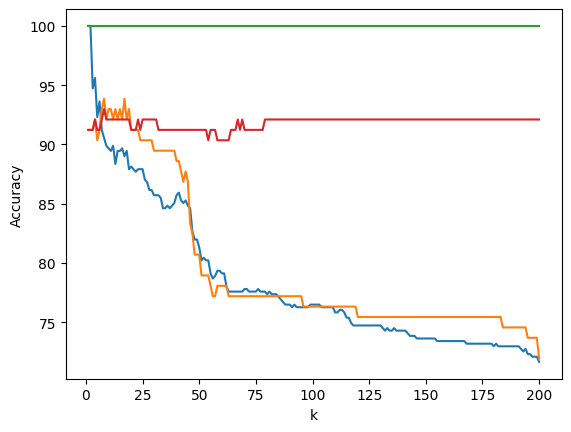

In [83]:
plt.plot(xs, ys_my_val, label='my, val')
plt.plot(xs, ys_my_test, label='my, test')
plt.plot(xs, ys_lib_val, label='lib, val')
plt.plot(xs, ys_lib_test, label='lib, test')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

In [98]:
counter = 0
success = 0
normal, anomalies = [], []

for x_id in range(len(X_train)):
    knn = KNN(
        k=5,
        metric='cosine',
        kernel='general'
    )
    knn.fit(np.delete(X_train, x_id, 0), np.delete(y_train, x_id, 0))
    prediction = knn._predict(X_train[x_id])
    counter += 1
    true_class = y_train[x_id]
    if true_class == prediction:
        normal.append(counter - 1)
    else:
        anomalies.append(counter - 1)

print("Accuracy", len(normal) / counter * 100)
print("Anomalies:", len(anomalies))


Accuracy 89.67032967032968
Anomalies: 47


Text(0, 0.5, 'Accuracy')

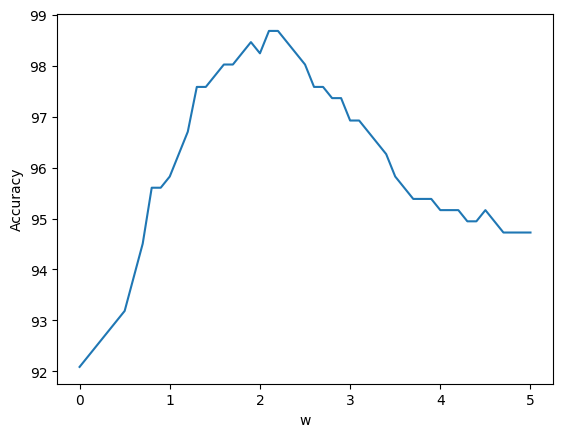

In [105]:
def get_new_weights(w):
    new_weights = []
    for i in range(len(X_train)):
        if i in anomalies:
            new_weights.append(w)
        else:
            new_weights.append(1)
    return new_weights

def get_accuracy(w, X, y):
    knn = KNN(
        k=5,
        metric='cosine',
        kernel='general'
    )
    knn.fit(np.delete(X_train, x_id, 0), np.delete(y_train, x_id, 0), get_new_weights(w))
    predictions = knn.predict(X)
    return accuracy(y, predictions)

xs = [x / 10 for x in range(0, 51)]
ys = [get_accuracy(w, X_train, y_train) for w in xs]
plt.plot(xs, ys)
plt.xlabel('w')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

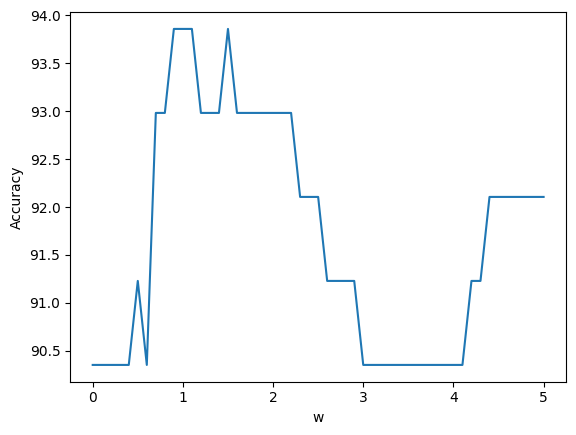

In [106]:
ys = [get_accuracy(w, X_test, y_test) for w in xs]
plt.plot(xs, ys)
plt.xlabel('w')
plt.ylabel('Accuracy')

In [123]:
def get_lib_accuracy(X, y, X_t, y_t):
    lib_knn = KNeighborsClassifier(weights='distance', metric='cosine', n_neighbors=8)
    predictions = lib_knn.fit(X, y).predict(X_t)
    return accuracy(y_t.to_list(), predictions)

In [127]:
X = data.drop('diagnosis',axis=1) 
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 17, shuffle = True)

X_an, y_an = X_train.iloc[anomalies], y_train.iloc[anomalies]
X_train_sampled, y_train_sampled = pd.concat([X_train, X_an]), pd.concat([y_train, y_an])

print("Old accuracy", get_lib_accuracy(X_train, y_train, X_test, y_test))
print("New accuracy", get_lib_accuracy(X_train_sampled, y_train_sampled, X_test, y_test))

Old accuracy 90.35087719298247
New accuracy 91.22807017543859
